In [ ]:
!pip install -U pip setuptools wheel spacy pandas scikit-learn matplotlib

In [163]:
import json

with open("./learning_ML/amazon_reviews.json", "r", encoding="utf-8") as file:
    data = [json.loads(s) for s in file]
print(data[:2])

[{'overall': 5.0, 'verified': True, 'reviewTime': '08 22, 2013', 'reviewerID': 'A34A1UP40713F8', 'asin': 'B00009W3I4', 'style': {'Style:': ' Dryer Vent'}, 'reviewerName': 'James. Backus', 'reviewText': 'I like this as a vent as well as something that will keep house warmer in winter.  I sanded it and then painted it the same color as the house.  Looks great.', 'summary': 'Great product', 'unixReviewTime': 1377129600}, {'overall': 5.0, 'verified': True, 'reviewTime': '02 8, 2016', 'reviewerID': 'A1AHW6I678O6F2', 'asin': 'B00009W3PA', 'style': {'Size:': ' 6-Foot'}, 'reviewerName': 'kevin.', 'reviewText': 'good item', 'summary': 'Five Stars', 'unixReviewTime': 1454889600}]


In [31]:
import pandas as pd

df = pd.json_normalize(data)
print(df.head(3))

   overall  verified   reviewTime      reviewerID        asin   reviewerName  \
0      5.0      True  08 22, 2013  A34A1UP40713F8  B00009W3I4  James. Backus   
1      5.0      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA         kevin.   
2      5.0      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA      CDBrannom   

                                          reviewText        summary  \
0  I like this as a vent as well as something tha...  Great product   
1                                          good item     Five Stars   
2                     Fit my new LG dryer perfectly.     Five Stars   

   unixReviewTime style.Style: style.Size: style.Color: vote image  \
0      1377129600   Dryer Vent         NaN          NaN  NaN   NaN   
1      1454889600          NaN      6-Foot          NaN  NaN   NaN   
2      1438732800          NaN      6-Foot          NaN  NaN   NaN   

  style.Size Name: style.Style Name: style.Package Quantity:  
0              NaN               NaN              

In [32]:
df2 = df[["overall", "reviewText"]].copy()
print(df2.head())

   overall                                         reviewText
0      5.0  I like this as a vent as well as something tha...
1      5.0                                          good item
2      5.0                     Fit my new LG dryer perfectly.
3      5.0                     Good value for electric dryers
4      5.0                  Price and delivery was excellent.


In [33]:
stars = df2.overall.unique()
stars.sort()
print(stars)

[1. 2. 3. 4. 5.]


In [34]:
rescaled_stars = list(map(lambda x: float(x/5), stars))
print(rescaled_stars)

[0.2, 0.4, 0.6, 0.8, 1.0]


In [166]:
rescaled_ratings = list(map(lambda x: float(x/5), df2["overall"]))
df2["ratio"] = df2["overall"].apply(lambda x: float(x/5))
print(df2["ratio"][5:10])

5    1.0
6    0.8
7    0.4
8    0.4
9    0.2
Name: ratio, dtype: float64


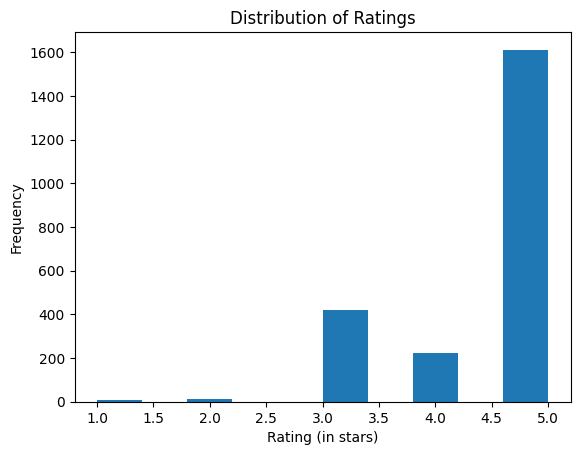

In [141]:
import matplotlib.pyplot as plt

plt.hist(df2["overall"], bins=10)
plt.xlabel('Rating (in stars)')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df2.reviewText, df2.ratio, test_size = 0.2)

v = TfidfVectorizer()
X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

v.get_feature_names_out()[100:150]

array(['asked', 'assumed', 'at', 'attach', 'attached', 'attaching',
       'attachment', 'attention', 'attic', 'authorized', 'auto',
       'available', 'ave', 'away', 'awesome', 'back', 'backed', 'backup',
       'bad', 'bag', 'basically', 'bath', 'batteries', 'be', 'became',
       'because', 'becomes', 'been', 'before', 'began', 'begin', 'behind',
       'being', 'believe', 'bell', 'bend', 'bends', 'bendy', 'best',
       'better', 'between', 'big', 'bigger', 'bill', 'birds', 'bit',
       'bits', 'blankets', 'blew', 'blockage'], dtype=object)

In [38]:
dict(list(v.vocabulary_.items())[:10])

{'first': 401,
 'thing': 1084,
 'it': 565,
 'works': 1247,
 'the': 1076,
 'kit': 585,
 'is': 561,
 'great': 460,
 'in': 538,
 'what': 1215}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y_train_class = (y_train >= 0.5).astype(int)
y_test_class = (y_test >= 0.5).astype(int)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_cv, y_train_class)

In [151]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)
print(classification_report(y_test_class, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00       450

    accuracy                           1.00       456
   macro avg       1.00      0.92      0.95       456
weighted avg       1.00      1.00      1.00       456



In [111]:
positive_test = ["love this amazing product"]
negative_test = ["hate this awful terrible product"]

print("Positive Test:", model.predict(v.transform(positive_test)))
print("Negative Test:", model.predict(v.transform(negative_test)))

Positive Test: [1]
Negative Test: [1]


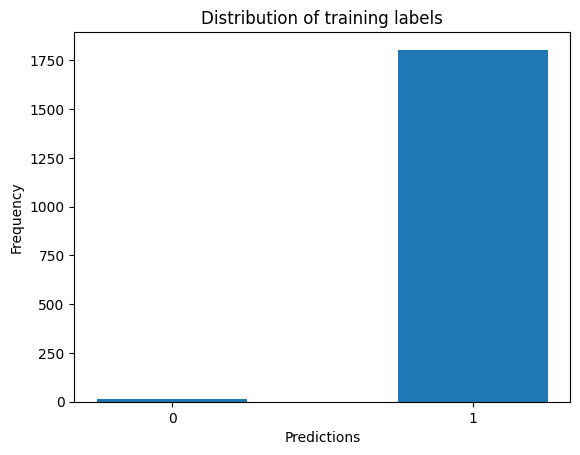

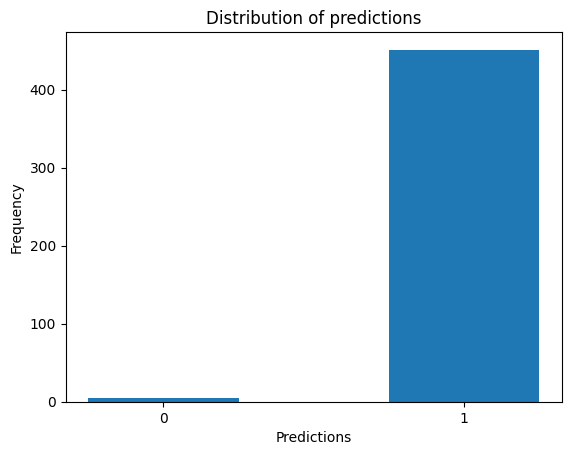

In [180]:
import numpy as np

plt.bar([0, 1], [np.count_nonzero(y_train_class == 0), np.count_nonzero(y_train_class == 1)], width = 0.5)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Distribution of training labels')
plt.show()

plt.bar([0, 1], [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)], width = 0.5)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Distribution of predictions')
plt.show()

These graphs show that the model's predictions are coherent with the distribution of training data. However its accuracy only stems from the fact that there are very few bad comments to predict, hence even with only failed predictions the model's score would remain high. 

The model has a 0.83 recall score on bad-comment detections.